In [ ]:
'''Here we are trying to find the logistic regression function for two datasets: newsgroup post, digits. 
Now we are interested in finding which method to find weights works best. We are employing probabilistic method 
with maximum likelihood. The essence of this method is to find the likelihood function and maximize this likelihood
function w.r.t the parameters.'''

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random

In [2]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from scipy import sparse
from scipy.sparse.linalg import inv

In [3]:
#one hot encoding for the y values n*m where m is the classes. 
def oneHot(Y):
    lowestValue = np.amin(Y)
    highestValue = np.amax(Y)
    y_oneHot = np.zeros((Y.shape[0], highestValue+1))
    y_oneHot[np.arange(Y.shape[0]),Y.transpose()] = 1

    return(y_oneHot)

In [4]:
def standardize( b ): #function for normalization. mean-variance method
    b = b.transpose() #b = N*M 
    a = np.empty( b.shape )
#     print(b.shape[0])
    for i in range(0,b.shape[0]):
        mean = np.mean(b[i,:])
#         print(mean)
        std = np.std(b[i,:])
        a[i,:] = (b[i,:]-mean)/std
#         print(a[i,:])
#         print(i)
        
    a = a.transpose()
    return a
    

In [5]:
def standardize2( b ): #function for normalization. min-max method
    b = b.transpose()
    a = np.empty( b.shape )
    i = 0
    for x in b:
        max = np.amax(x)
        min = np.amin(x)
        range = max - min
        if range == 0:
            a[i] = np.full( b[i].shape , 1 )
            i+=1
            continue
            
        a[i] = (b[i]-min)/range
        i+=1
    a = a.transpose()
    a[np.isnan(a)]=1
    return a

In [6]:
def error(X, Y, w):
    error = 0.0
    i = 0
    activation = np.exp(np.matmul(w[:,np.arange(K)].transpose(), X.transpose())) #10*n
    prediction = np.divide(activation[np.arange(K),:], np.sum(activation, axis=0))
#     print('prediction ' +str(prediction))
    classIndexValuesPrediction = np.argmax(prediction.transpose(), axis=1) #n*1 array
#     print('prediction '+str(classIndexValuesPrediction.shape) +str(classIndexValuesPrediction))
    classIndexValuesY = np.argmax(Y, axis=1)
#     classIndexValuesY = 
#     print('Y ' +str(classIndexValuesY))
    diff = classIndexValuesPrediction - classIndexValuesY
    
#     print('dif '+str(diff))
    error = np.count_nonzero(diff)/len(diff)*100
#     error = np.sqrt(np.matmul(diff.transpose(),diff)/X.shape[0]) #RMSE error
    return error

In [7]:
'''Data preprocessing'''

#get the txt file into pandas
testData_pd = pd.read_csv('./dataSet/logistic_digits_test.txt', sep=',')
trainData_pd = pd.read_csv('./dataSet/logistic_digits_train.txt', sep=',')
trainData_pd = trainData_pd.loc[:, (trainData_pd != 0).any(axis=0)]
# print((trainData_pd != 0).any(axis=0))
# print((testData_pd != 0).any(axis=0))
testData_pd = testData_pd.loc[:, (testData_pd != 0).any(axis=0)]
testData_pd.insert(54,'additional',0)
# print(testData_pd.head())

#convert it into a numpy array
testData = testData_pd.as_matrix()
trainData = trainData_pd.as_matrix()

#x-y split
x_train = trainData[:,:-1]
y_train = trainData[:,trainData.shape[1]-1]
y_train = np.reshape(y_train,(y_train.shape[0],1))
x_test = testData[:,:-1]
y_test = testData[:,testData.shape[1]-1]
y_test = np.reshape(y_test,(y_test.shape[0],1))

#one hot encoding
y_train = oneHot(y_train) #n*10 matrix 
y_test = oneHot(y_test)
# print(max(x_train[:,10]),min(x_train[:,10]),np.mean(x_train[:,10]),np.std(x_train[:,10]))

#Standardizing the data 

x_train  = standardize2(x_train)
x_test  = standardize2(x_test)

y_train  = standardize2(y_train)
y_test  = standardize2(y_test)
# print(max(x_train[:,1]),min(x_train[:,1]))


#getting the shape of the data
K = y_train.shape[1] #number of classes
N = y_train.shape[0] #number of datapoints
M = x_train.shape[1] #number of features

#Check
print(y_train.shape)
print(x_test.shape)
# print(y_test)
print(K,N,M)



(1198, 10)
(599, 62)
10 1198 62


/Users/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [100]:
'''Data preprocessing SECOND DATA SET'''

#get the txt file into pandas
testData_pd = pd.read_csv('./dataSet/logistic_news_test.txt', sep=',')
trainData_pd = pd.read_csv('./dataSet/logistic_news_train.txt', sep=',')

trainData_pd = trainData_pd.loc[:, (trainData_pd != 0).any(axis=0)]
testData_pd = testData_pd.loc[:, (testData_pd != 0).any(axis=0)]
trainData_pd = trainData_pd.loc[:, (trainData_pd != 1).any(axis=0)]
testData_pd = testData_pd.loc[:, (testData_pd != 1).any(axis=0)]
print(testData_pd.head())


#convert it into a numpy array
testData = testData_pd.as_matrix()
trainData = trainData_pd.as_matrix()

#x-y split
x_train = trainData[:,:-1]
y_train = trainData[:,trainData.shape[1]-1]
y_train = np.reshape(y_train,(y_train.shape[0],1))
x_test = testData[:,:-1]
y_test = testData[:,testData.shape[1]-1]
y_test = np.reshape(y_test,(y_test.shape[0],1))

# print(y_train)

#one hot encoding
y_train = oneHot(y_train.astype(int)) #n*10 matrix 
y_test = oneHot(y_test.astype(int))
# print(max(x_train[:,10]),min(x_train[:,10]),np.mean(x_train[:,10]),np.std(x_train[:,10]))

#Standardizing the data 
# x_train  = standardize2(x_train)
# x_test  = standardize2(x_test)

# y_train  = standardize2(y_train)
# y_test  = standardize2(y_test)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
# print(max(x_train[:,10]),min(x_train[:,10]))


#getting the shape of the data
K = y_train.shape[1] #number of classes
N = y_train.shape[0] #number of datapoints
M = x_train.shape[1] #number of features

#Check
print(y_train.shape)
print(x_test.shape)
print(K,N,M)
print(y_train)
print(x_train)



   X_test_   2  X_test_   3  X_test_   4  X_test_   5  X_test_   6  \
0     0.834782     0.234278    -0.017436    -0.047356    -0.067231   
1     0.852295     0.157635     0.057259    -0.236692     0.045507   
2     0.132996    -0.047609     0.028637    -0.015886    -0.016645   
3     0.742606     0.181835    -0.111287    -0.086347     0.118671   
4     0.135159    -0.017523     0.050122    -0.036126     0.054531   

   X_test_   7  X_test_   8  X_test_   9  X_test_  10  X_test_  11  ...  \
0    -0.011004    -0.021351     0.077255     0.025225    -0.070891  ...   
1    -0.000694    -0.042309    -0.043537    -0.097879     0.005942  ...   
2     0.023022     0.044999     0.033764    -0.001003    -0.013565  ...   
3     0.040703     0.021187    -0.055914    -0.188126     0.031402  ...   
4     0.033828     0.101636     0.045574     0.045485    -0.078620  ...   

   X_test_1993  X_test_1994   X_test_1995  X_test_1996  X_test_1997  \
0     0.000058    -0.000002 -5.127022e-05     0.000029   

/Users/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/Users/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


(12564, 20)
(6282, 2000)
20 12564 2000
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 0.24901361 -0.23411713  0.63810881 ... -0.96095732  0.93795893
   0.00594843]
 [ 0.21079609  0.41709136  1.07435187 ... -0.49888072  1.0635867
   0.56255795]
 [ 0.23507249 -0.48874567 -0.92447417 ... -1.13592244 -0.64246661
   0.19691724]
 ...
 [ 0.89057997  0.55312225 -0.1236622  ... -3.15052909  1.68020196
   0.41804169]
 [ 0.45529925  0.89384238 -0.80992619 ... -0.14299188 -0.55969941
   0.33156614]
 [-0.16607043 -0.79716445  0.86396165 ...  0.32624338  1.32945974
   0.79379887]]


In [102]:
def gradientDescent():
    print ('***********Gradient Descent Method***********')
    
    #random initialization of weights in [0,1)
    

    w = np.zeros((M,K))
    
    


    #hardcoded parameters
    
#     numOfIters = 30
#     alpha = 100
    
    numOfIters = 20
    alpha = 0.002
    cost =[[]]*3

    
    #gradient descent 
    i=0
    while i<numOfIters:
        
        #vectorized to run in one loop

        grad = np.zeros((M,K))  #65*10

        activation = np.exp(np.matmul(w[:,np.arange(K)].transpose(), x_train.transpose())) #10*n     
        y_prediction = np.divide(activation[np.arange(K),:], np.sum(activation, axis=0)) #10*n
 
        grad = np.matmul((y_prediction.transpose()-y_train).transpose(),x_train)+1/N*w.transpose()
        grad = grad/N

        w = w-alpha*grad.transpose() #65*10
        
        cost[1].append(np.sum(-(np.multiply(np.log(y_prediction.transpose()), y_train))))
            


        i+=1
    
    fig, ax = plt.subplots()
    ax.scatter(range(0,i), cost[1], label='alpha = ' +str(alpha))
#     ax.plot(range(0,i), cost[:, 1] , label='Actual')
    ax.set_title('Gradient Descent for news dataset')
    ax.set_xlabel('Iterations') #: Use this if you want
    ax.set_ylabel('Cost')
    ax.grid()
    leg = ax.legend()
#     plt.savefig('Gradient_Descent_for_news_dataset_with_4th_alpha_standardize2',dpi=300, bbox_inches='tight')
    plt.show()

    
    
#     print('The weight value is: \n'+str(w))
    print('Error is:', str(error(x_test , y_test ,w)))
    return cost[1]

***********Gradient Descent Method***********


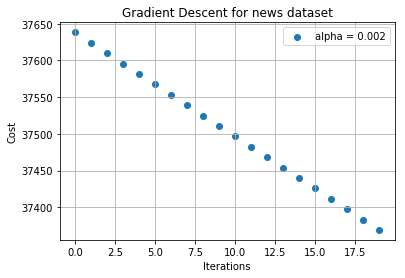

Error is: 32.744348933460685


In [103]:
costGD = gradientDescent()

In [104]:
def stochasticGradientDescent():
    print ('***********SGD Method***********')
    
    #random initialization of weights in [0,1)
    

    w = np.zeros((M,K))
 
    #hardcoded parameters
    
    numOfIters = 20
    alpha = [0.002]
    
    cost = []
    batchsize = N-1
    #gradient descent 
    epoch=0
       
    while epoch<numOfIters:
        
        index = random.sample(range(0, N-1),batchsize)
        x_train_sgd = x_train[index,:]
        y_train_sgd = y_train[index,:]
#         K = y_train.shape[1]

        #-------------------------SGD part--------------------------------------
        w_list = []
        for i in index:
            
            grad = np.zeros((M,K))  #65*10

            activation = np.exp(np.matmul(w.T, x_train[i,:].transpose())) #10*1 
            y_prediction = np.divide(activation, np.sum(activation, axis=0)) #10*1
            
            grad = np.matmul(x_train[i,:].reshape((1,-1)).T,(y_prediction-y_train[i,:]).reshape((-1,K)))+1/N*w 
        #-----------------------update w-------------------------------------------------
            w = w-alpha[0]*(grad) #65*10
            w_list.append(w)
        
        
        activation_cost = np.exp(np.matmul(w.T, x_train[index,:].transpose())) #10*1 
        y_prediction_cost = np.divide(activation_cost, np.sum(activation_cost, axis=0)) #10*1

        cost.append(np.sum(-(np.multiply(np.log(y_prediction_cost.transpose()), y_train_sgd))))
        
        epoch+=1
        
        
    
#     fig, ax = plt.subplots()
#     ax.plot(range(0,epoch), cost[:], label='alpha = ' +str(alpha)+' batchsize =' +str(batchsize))
# #     ax.plot(range(0,i), cost[:, 1] , label='Actual')
# #     ax.set_title('Gradient Descent for news dataset')
#     ax.set_xlabel('Iterations') #: Use this if you want
#     ax.set_ylabel('Cost')
#     ax.grid()
#     leg = ax.legend()
#     plt.savefig('Stochastic_Gradient_Descent_for_newsts_dataset_with_variable_alpha_batchsize_N',dpi=300, bbox_inches='tight')
#     plt.show()
    
#     print('The weight value is: \n'+str(w))
    print('Error is:', str(error(x_test , y_test ,w)))
#     print('Error is:', str(error(x_test , y_test ,w))) 
    return cost

In [105]:
costSGDg = stochasticGradientDescent()

***********SGD Method***********


KeyboardInterrupt: 

# SVRG 

In [41]:
def SVRG():
    print ('***********SVRG Method***********')
    w = np.zeros((M,K))
    w_old = np.zeros((M,K))
    w_old_batch = np.zeros((M,K))
    cost = []
    
    numOfIters = 20
    batchsize = (N-1)
    alpha = [0.002]
    

    epoch= 0
    while epoch<numOfIters:
        
        index = random.sample(range(0, N-1),batchsize)

        
        #-------------------------The batch part-------------------------------
        
        
        grad_old_batch = np.zeros((M,K))  #65*10

        activation_old_batch = np.exp(np.matmul(w_old_batch.transpose(), x_train.transpose())) #10*n     
        y_prediction_old_batch = np.divide(activation_old_batch, np.sum(activation_old_batch, axis=0)) #10*n
 
        grad_old_batch = np.matmul((y_prediction_old_batch.transpose()-y_train).transpose(),x_train)+1/N*w_old_batch.transpose()
        grad_old_batch = grad_old_batch/N

        #-------------------------SGD part--------------------------------------
        w_list = []
        for i in index:
            
            grad = np.zeros((M,K))  #65*10

            activation = np.exp(np.matmul(w.T, x_train[i,:].transpose())) #10*1 
            y_prediction = np.divide(activation, np.sum(activation, axis=0)) #10*1
            
    
            grad = np.matmul(x_train[i,:].reshape((1,-1)).T,(y_prediction-y_train[i,:]).reshape((-1,K)))+1/N*w

        #------------------------w_old part--------------------------------------------
            
            grad_old = np.zeros((M,K))  #65*10

            activation_old = np.exp(np.matmul(w_old.T, x_train[i,:].transpose())) #10*1 
            y_prediction_old = np.divide(activation_old, np.sum(activation_old, axis=0)) #10*1
            
            
            grad_old = np.matmul(x_train[i,:].reshape((1,-1)).T,(y_prediction_old-y_train[i,:]).reshape((-1,K)))+1/N*w_old
        
        #-----------------------update w-------------------------------------------------
#             print(grad.shape)
            w = w-alpha[0]*(grad-grad_old+grad_old_batch.T) #65*10
            w_list.append(w)
        

        
        

        #---------------------option 1----------------------
        w_old = w_list[N-2]
#         #---------------------option 2----------------------
#         w_old = sum(w_list)/batchsize
#         #---------------------option 3----------------------
#         w_old = w_list[random.sample(range(0, batchsize),1)[0]]
      #------------------------update w_old--------------------------------------------
        w_old_batch = w_old
        
#         print(len(w_list))

        activation_cost = np.exp(np.matmul(w_old.T, x_train.transpose())) #10*1 
        y_prediction_cost = np.divide(activation_cost, np.sum(activation_cost, axis=0)) #10*1
        
        cost.append(np.sum(-(np.multiply(np.log(y_prediction_cost.transpose()), y_train))))
#         print(cost)
        
        epoch+=1

        #-----------------cost computation-----------------------------------------
        
        
        
        
#     print(len(cost))
    fig, ax = plt.subplots()
    ax.scatter(range(0,epoch), cost, label='alpha = ' +str(alpha)+' batchsize =' +str(batchsize))
#     ax.plot(range(0,i), cost[:, 1] , label='Actual')
#     ax.set_title('Gradient Descent for news dataset')
    ax.set_xlabel('Iterations') #: Use this if you want
    ax.set_ylabel('Cost')
    ax.grid()
    leg = ax.legend()
#     plt.savefig('Stochastic_Gradient_Descent_for_newsts_dataset_with_variable_alpha_batchsize_N',dpi=300, bbox_inches='tight')
    plt.show()
    
#     print('The weight value is: \n'+str(w))
    print('Error is:', str(error(x_test , y_test ,w)))
#     print('Error is:', str(error(x_test , y_test ,w)))
    return cost

***********SVRG Method***********


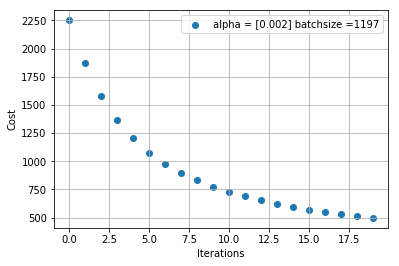

Error is: 6.010016694490818


In [42]:
costSVRG = SVRG()

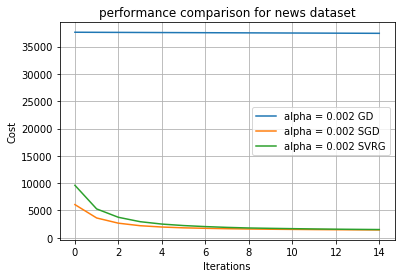

In [30]:
alpha = 0.002
iters = 15
batchsize = N
fig, ax = plt.subplots()
ax.plot(range(0,iters), costGD[:iters], label='alpha = ' +str(alpha)+' GD')
ax.plot(range(0,iters), costSGD[:iters], label='alpha = ' +str(alpha)+' SGD')
ax.plot(range(0,iters), costSVRG1[:iters], label='alpha = ' +str(alpha)+' SVRG')
ax.set_title('performance comparison for news dataset')
ax.set_xlabel('Iterations') 
ax.set_ylabel('Cost')
ax.grid()
leg = ax.legend()
plt.savefig('Q2G3.pdf',format='pdf', dpi=1500, bbox_inches='tight')
plt.show()

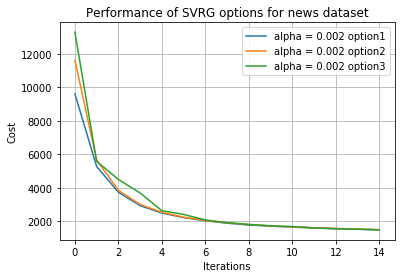

In [35]:
alpha = 0.002
iters = 15
batchsize = N
fig, ax = plt.subplots()
ax.plot(range(0,iters), costSVRG1[:iters], label='alpha = ' +str(alpha)+' option1')
ax.plot(range(0,iters), costSVRG2[:iters], label='alpha = ' +str(alpha)+' option2')
ax.plot(range(0,iters), costSVRG3[:iters], label='alpha = ' +str(alpha)+' option3')
ax.set_title('Performance of SVRG options for news dataset')
ax.set_xlabel('Iterations') 
ax.set_ylabel('Cost')
ax.grid()
leg = ax.legend()
plt.savefig('Q2G4.pdf',format='pdf', dpi=1500, bbox_inches='tight')
plt.show()

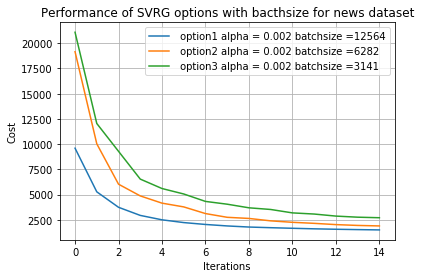

In [61]:
alpha = 0.002
iters = 15
batchsize = N
fig, ax = plt.subplots()
ax.plot(range(0,iters), costSVRG1[:iters], label=' option1 '+'alpha = ' +str(alpha) + ' batchsize =' +'12564')
ax.plot(range(0,iters), costSVRG2m[:iters], label=' option2 '+'alpha = ' +str(alpha)+ ' batchsize =' +'6282')
ax.plot(range(0,iters), costSVRG3m[:iters], label=' option3 '+'alpha = ' +str(alpha)+ ' batchsize =' + '3141')
ax.set_title('Performance of SVRG options with bacthsize for news dataset')
ax.set_xlabel('Iterations') 
ax.set_ylabel('Cost')
ax.grid()
leg = ax.legend()
plt.savefig('Q2G5.pdf',format='pdf', dpi=1500, bbox_inches='tight')
plt.show()

In [53]:
N*0.25

3141.0

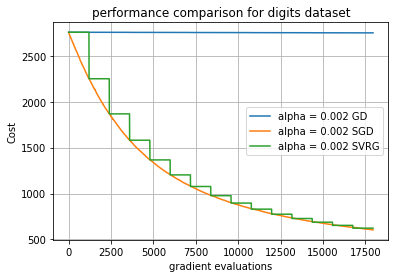

In [99]:
alpha = 0.002
iters = 15
batchsize = N
fig, ax = plt.subplots()
ax.plot(range(0,len(costSVRG3g)), np.repeat(np.asarray(costGD), N)[:len(costSVRG3g)], label='alpha = ' +str(alpha)+' GD')
ax.plot(range(0,len(costSVRG3g)), costSGDg[:len(costSVRG3g)], label='alpha = ' +str(alpha)+' SGD')
ax.plot(range(0,len(costSVRG3g)), costSVRG3g, label='alpha = ' +str(alpha)+' SVRG')
ax.set_title('performance comparison for digits dataset')
ax.set_xlabel('gradient evaluations') 
ax.set_ylabel('Cost')
ax.grid()
leg = ax.legend()
plt.savefig('Q2G6.pdf',format='pdf', dpi=1500, bbox_inches='tight')
plt.show()

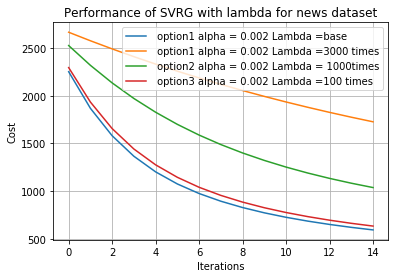

In [44]:
alpha = 0.002
iters = 15
batchsize = N
fig, ax = plt.subplots()
ax.plot(range(0,iters), costSVRG[:iters], label=' option1 '+'alpha = ' +str(alpha) + ' Lambda =' +'base')
ax.plot(range(0,iters), costSVRG1l[:iters], label=' option1 '+'alpha = ' +str(alpha) + ' Lambda =' +'3000 times')
ax.plot(range(0,iters), costSVRG2l[:iters], label=' option2 '+'alpha = ' +str(alpha)+ ' Lambda =' +' 1000times')
ax.plot(range(0,iters), costSVRG3l[:iters], label=' option3 '+'alpha = ' +str(alpha)+ ' Lambda =' + '100 times')
ax.set_title('Performance of SVRG with lambda for news dataset')
ax.set_xlabel('Iterations') 
ax.set_ylabel('Cost')
ax.grid()
leg = ax.legend()
plt.savefig('Q2G8.pdf',format='pdf', dpi=1500, bbox_inches='tight')
plt.show()